In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import json

In [2]:
# importing json into python
with open('data_2hr.json', 'r') as openfile:
    data = json.load(openfile)

print(data[0])

{'timestamp': 1705477994.0, 'data': [-0.14244897959183672, -0.13795918367346938, -0.12489795918367347, -0.11591836734693878, -0.09795918367346938, -0.08653061224489796, -0.07102040816326531, -0.05510204081632653, -0.037142857142857144, -0.026122448979591838, -0.019183673469387756, -0.005714285714285714, 0.0008163265306122449, 0.0008163265306122449, 0.0008163265306122449, 0.0008163265306122449, 0.0069387755102040816, 0.0069387755102040816, 0.009387755102040816, 0.009387755102040816, 0.013877551020408163, 0.009387755102040816, 0.002857142857142857, 0.0008163265306122449, 0.0008163265306122449, 0.0008163265306122449, 0.0008163265306122449, 0.0008163265306122449, -0.003673469387755102, 0.0008163265306122449, -0.00816326530612245, -0.003673469387755102, -0.00816326530612245, -0.00816326530612245, -0.01020408163265306, -0.01020408163265306, -0.017142857142857144, -0.014693877551020407, -0.02163265306122449, -0.019183673469387756, -0.02163265306122449, -0.026122448979591838, -0.02367346938775

In [3]:
#function to flatten a list of lists into a single list
def flatten(xss):
    return [x for xs in xss for x in xs]

#returns a single list of each: timestamps in string format, ecg values for 12/24 hrs, keys(0,1,2.. length of ecg)
def generate_sample_ecg_data():
    with open('data_2hr.json', 'r') as openfile:
        data = json.load(openfile)

    TIME_FORMAT = '%d-%m %H:%M:%S'
    timestmps, ecgs = [], []
    for d in data:
        ecgs.append(d['data'])
        timestmps.append([datetime.utcfromtimestamp(
            d['timestamp']).strftime(TIME_FORMAT)] * 125)

    ecgs = flatten(ecgs)
    timestmps = flatten(timestmps)
    t = [x for x in range(len(ecgs))] 
    return t, ecgs, timestmps

In [4]:
t, ecgs, timestmps = generate_sample_ecg_data()

## Simple 10s plot

In [5]:
sampling_rate = 125
window = 10  #to splot

# sample a random 10 second segment
random_ts = np.random.choice(t[:-(sampling_rate*window)])

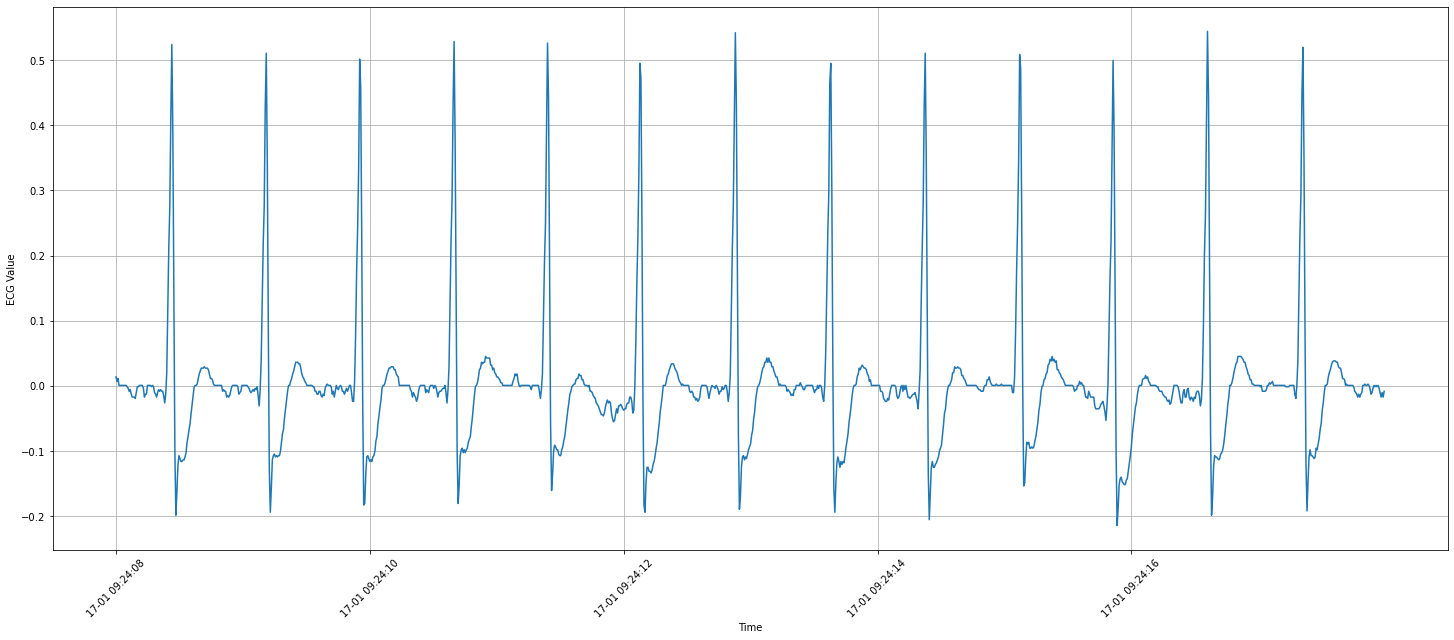

<Figure size 432x288 with 0 Axes>

In [9]:
window_ts = timestmps[random_ts : random_ts+(sampling_rate*window)]

plt.figure(figsize=(25, 10))  #Set Fig Size
plt.plot(t[random_ts : random_ts+(sampling_rate*window)], ecgs[random_ts : random_ts+(sampling_rate*window)])
plt.xlabel("Time")
plt.xticks(t[random_ts : random_ts+(sampling_rate*window)][::250], window_ts[::250], rotation=45)
plt.ylabel("ECG Value")
plt.grid(True)
plt.show()
plt.savefig('ecg.png', facecolor='white', transparent=True)

## Interactive Plot

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np


# Function to plot 10-second segment
def plot_segment(start_index):
    end_index = start_index + 10 * sampling_rate  
    segment_ecg = ecgs[start_index:end_index]
    segment_t = t[start_index:end_index]
    segment_timestamp = timestmps[start_index:end_index]

    plt.figure(figsize=(10, 4))
    plt.plot(segment_t, segment_ecg)
    plt.title(f"10-second ECG segment starting at time : {segment_timestamp[0]}")
    plt.xlabel("Time")
    plt.xticks([])  #We are not plotting x axis labels here, instead we plot the timesegment in the title
    plt.ylabel("ECG Value")
    plt.show()
    
sampling_rate = 125  
max_index = len(ecgs) - 10 * sampling_rate
# interactive slider for timestamp selection

interact(plot_segment, start_index=(0, max_index, sampling_rate))


interactive(children=(IntSlider(value=449375, description='start_index', max=898750, step=125), Output()), _do…

<function __main__.plot_segment(start_index)>